In [2]:
# be careful about python installation
import sys
sys.executable
!/Users/osipova/anaconda3/bin/python -m pip install matplotlib_venn

You are using pip version 9.0.3, however version 20.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
%matplotlib inline
import numpy as np
from glob import glob
import pandas as pd
import statsmodels.stats.multitest
from matplotlib import pyplot as plt
import matplotlib_venn as venn

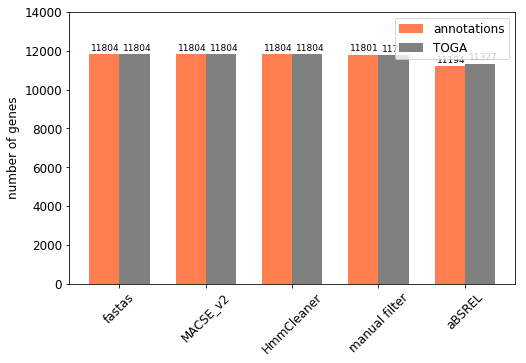

In [2]:
## Get stats on number of genes on each stage
# # PRANK
# gene_number_anno = [10673, 10490, 10490, 10489, 10004]
# gene_number_toga = [10673, 10673, 10673, 10643, 10073]
# stage_name = ['fastas', 'PRANK', 'HmmCleaner', 'manual filter', 'aBSREL']

# MACSE_v2
gene_number_anno = [11804, 11804, 11804, 11801, 11194]
gene_number_toga = [11804, 11804, 11804, 11774, 11327]
stage_name = ['fastas', 'MACSE_v2', 'HmmCleaner', 'manual filter', 'aBSREL']
stage_number = np.arange(5)
width = 0.35

plt.figure(figsize=(8, 5))
plt.xticks(stage_number + width / 2, stage_name, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
gn1 = plt.bar(stage_number, gene_number_anno, width, color='coral')
gn2 = plt.bar(stage_number + width, gene_number_toga, width, color='grey')

for i, v in enumerate(gene_number_anno):
    plt.text(i - 0.15, v + 200, str(v), fontsize=9)
for i, v in enumerate(gene_number_toga):
    plt.text(i + 0.22, v + 200, str(v), fontsize=9)

plt.ylim(0, 14000)
plt.ylabel('number of genes', fontsize = 12)
plt.legend((gn1[0], gn2[0]), ('annotations', 'TOGA'), fontsize=12)

#plt.savefig('gene_numbers_stats_prank_fixed.svg')

In [20]:
## Run stats for aBSREL results
results_dir_anno = 'results_absrel_annotations/'
results_dir_toga = 'results_absrel_toga/'
init_table = 'lowest.lowest.all.genes.pval.table.tsv'

all_genes_file_anno = glob('/Users/osipova/Documents/Py_scripts/absrel/' + results_dir_anno + init_table)[0]
all_genes_file_toga = glob('/Users/osipova/Documents/Py_scripts/absrel/' + results_dir_toga + init_table)[0]

df_anno = pd.read_csv(all_genes_file_anno, sep='\t')
df_toga = pd.read_csv(all_genes_file_toga, sep='\t')

In [21]:
# annotations
df_anno_hmmbrds = df_anno.loc[df_anno['branch'] == 'HLcalAnn5_HLfloFus1']
df_anno_lorikeet = df_anno.loc[df_anno['branch'] == 'HLtriMol2']
df_anno_parrots = df_anno.loc[df_anno['branch'] == 'melUnd1_HLstrHab1']
df_anno_honeyeaters = df_anno.loc[df_anno['branch'] == 'HLlicCas1_HLphyNov1']

# toga
df_toga_hmmbrds = df_toga.loc[df_toga['branch'] == 'HLcalAnn5_HLfloFus1']
df_toga_lorikeet = df_toga.loc[df_toga['branch'] == 'HLtriMol2']
df_toga_parrots = df_toga.loc[df_toga['branch'] == 'melUnd1_HLstrHab1']
df_toga_honeyeaters = df_toga.loc[df_toga['branch'] == 'HLlicCas1_HLphyNov1']

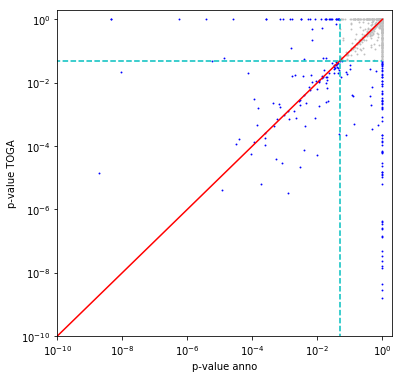

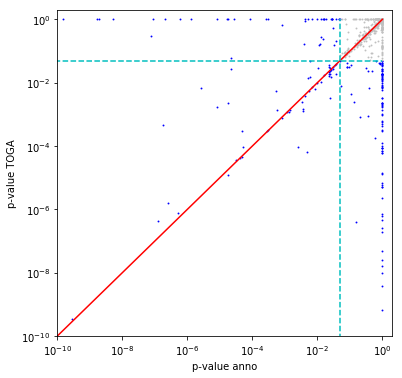

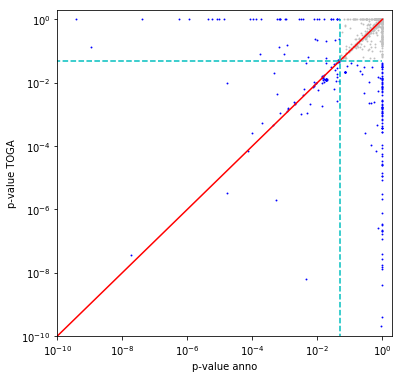

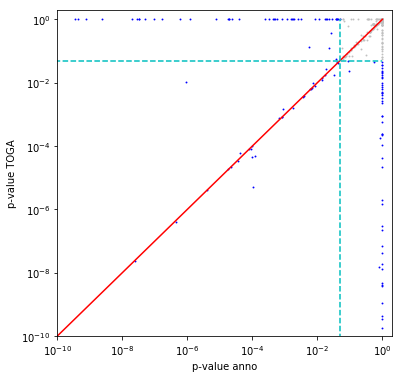

In [22]:
## plot P-value matrix
def plot_pval_matrix(df_sign, df_nonsign, pval):

    x = [10**-12, 1]
    line = [pval, pval]
    fig = plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.plot(df_sign['pval_anno'], df_sign['pval_toga'], 'ro', ms=0.9, c='b')
    ax.plot(df_nonsign['pval_anno'], df_nonsign['pval_toga'], 'ro', ms=0.9, c='silver')
    ax.plot(x, x, c='r')
    ax.plot(x, line, c='c', linestyle='--')
    ax.plot(line, x, c='c', linestyle='--')
    ax.set_xscale('log') 
    ax.set_yscale('log')
    ax.set_xlabel('p-value anno')
    ax.set_ylabel('p-value TOGA')

    plt.xlim([10**-10,2])
    plt.ylim([10**-10,2])
    plt.show()
    #plt.savefig('explor_highest_pvalue_anno_toga_macse.pdf')
    return


def get_pval_tables(df_anno, df_toga, pval):
    merged_df = pd.merge(df_anno[['gene', 'pval']], df_toga[['gene', 'pval']],\
                         on=['gene'], suffixes=('_anno', '_toga'))
    sign_df = merged_df[(merged_df['pval_anno'] <= pval) | (merged_df['pval_toga'] <= pval)]
    nonsign_df = merged_df[(merged_df['pval_anno'] >= pval) & (merged_df['pval_toga'] >= pval)]
    return sign_df, nonsign_df


## hummingbirds
# print('Number of genes in anno: {}'.format(len(df_anno_hmmbrds)))
# print('Number of genes in TOGA: {}'.format(len(df_toga_hmmbrds)))
# print('Number of intersecting genes: {}'.format(len(merged_df_hmmbrds)))
# print('Number of genes sign p-val: {}'.format(len(sign_filt_merged_df_hmmbrds)))
# print('Number of non-sign genes: {}'.format(len(nonsign_df_hmmbrds)))
sign_df_hmmbrds, nonsign_df_hmmbrds = get_pval_tables(df_anno_hmmbrds, df_toga_hmmbrds, .05)
plot_pval_matrix(sign_df_hmmbrds, nonsign_df_hmmbrds, .05)

# ## honeyeaters
sign_df_honey, nonsign_df_honey = get_pval_tables(df_anno_honeyeaters, df_toga_honeyeaters, .05)
plot_pval_matrix(sign_df_honey, nonsign_df_honey, .05)

# ## parrots
sign_df_parrots, nonsign_df_parrots = get_pval_tables(df_anno_parrots, df_toga_parrots, .05)
plot_pval_matrix(sign_df_parrots, nonsign_df_parrots, .05)

## lorikeet
sign_df_lorikeet, nonsign_df_lorikeet = get_pval_tables(df_anno_lorikeet, df_toga_lorikeet, .05)
plot_pval_matrix(sign_df_lorikeet, nonsign_df_lorikeet, .05)

# chose what to save
#plt.savefig('pvalue_anno_toga_FG_prank_fixed.pdf')
#plt.savefig('pvalue_anno_toga_explor_misalign_zoomout.pdf')
#plt.savefig('pvalue_anno_toga_FG_hmmbrds_prank_fixed.pdf')
#plt.savefig('symlog.pvalue_anno_toga_FG_hmmbrds_prank_fixed.pdf')
#plt.savefig('uncorrected_pvalue_anno_toga_macse.pdf')


In [34]:
## Get genes you need to check
def get_genes_sign_only_anno(df, pval):
    genes_df = df[(df['pval_anno'] <= pval) & (df['pval_toga'] > pval)].sort_values(by=['pval_anno', 'pval_toga'])
    return genes_df


def get_genes_sign_only_toga(df, pval):
    genes_df = df[(df['pval_toga'] <= pval) & (df['pval_anno'] > pval)].sort_values(by=['pval_anno', 'pval_toga'])
    return genes_df

def get_genes_sign_anno_toga(df, pval):
    genes_df = df[(df['pval_toga'] <= pval) & (df['pval_anno'] <= pval)].sort_values(by=['pval_anno', 'pval_toga'])
    return genes_df

## hummingbirds
# get_genes_sign_anno_toga(sign_df_hmmbrds, .01)
# get_genes_sign_only_anno(sign_df_hmmbrds, 1e-5)

## honeyeaters
# get_genes_sign_anno_toga(sign_df_honey, .01)
# get_genes_sign_only_toga(sign_df_honey, 1e-5)


## parrots
# get_genes_sign_anno_toga(sign_df_parrots, .01)
get_genes_sign_only_toga(sign_df_parrots, 1e-5)

## lorikeet
# get_genes_sign_anno_toga(sign_df_lorikeet, .01)
# get_genes_sign_only_toga(sign_df_lorikeet, 1e-5)


,gene,pval_anno,pval_toga
7599,gene-XM_001233038.5,0.000017,3.193040e-06
821,gene-XM_015295489.2,0.000530,1.980105e-06
263,gene-XM_015292146.2,0.004471,6.313341e-09
7581,gene-XM_015296599.2,0.760267,2.624672e-07
6427,gene-XM_015283617.2,0.926873,2.089650e-10
7197,gene-XM_015277677.2,0.968260,1.185663e-12
275,gene-XM_015283292.2,1.000000,0.000000e+00
6991,gene-XM_025143669.1,1.000000,0.000000e+00
10211,gene-XM_015279496.2,1.000000,0.000000e+00
4339,gene-XM_015276070.2,1.000000,1.898481e-14


Number of cases p-val = 1.0: 28132
Number of cases p-val < 1.0: 3792
Number of cases p-val = 0.0: 0
Number of cases p-val <= 0.05: 730


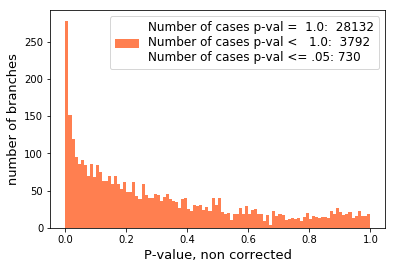

In [14]:
# plt p-values for one table
df = df_anno
color = 'coral'

print('Number of cases p-val = 1.0: {}'.format(len(df.loc[df['pval'] == 1])))
non_one_df = df.loc[df['pval'] < 1]
zero_df = df.loc[df['pval'] == 0]
print('Number of cases p-val < 1.0: {}'.format(len(non_one_df)))
print('Number of cases p-val = 0.0: {}'.format(len(zero_df)))
print('Number of cases p-val <= 0.05: {}'.format(len(df.loc[df['pval'] <= .05])))
plt.hist(non_one_df['pval'].values, bins=100, color=color)
plt.ylabel('number of branches', fontsize=13)
plt.xlabel('P-value, non corrected', fontsize=13)
plt.legend(('Number of cases p-val =  1.0:  {}\nNumber of cases p-val <   1.0:  {}\nNumber of cases p-val <= .05: {}'\
             .format(len(df.loc[df['pval'] == 1]), len(non_one_df), len(df.loc[df['pval'] <= .05])), "0-1", "10-100"),\
           fontsize=12)

plt.show()
# plt.savefig(results_dir + '/pval_histogram.pdf')

In [120]:
# #df.sort_values(['gene', 'pval'], ascending=[0,1]
# df_grouped = df.groupby('gene')
# for gene in df_grouped:
#     gene_df = gene[1]
#     #gene_df['rank'] = gene_df['pval'].rank()
#     gene_df['bh_pval'] = statsmodels.stats.multitest.multipletests(gene_df['pval'], alpha=0.05, method='fdr_bh')[1]

In [18]:
## Get significant p-values without any correction
#

# for TOGA-based or anno-based?
df_hmmbrds = df_anno_hmmbrds
df_lorikeet = df_anno_lorikeet
df_parrots = df_anno_parrots
df_honeyeaters = df_anno_honeyeaters
results_dir = results_dir_anno


# hummingbirds
df_hmmbrds_sign = df_hmmbrds.loc[df_hmmbrds['pval'] <= 0.05]
genes_hmmbrds_sign = df_hmmbrds_sign['gene']
print(len(genes_hmmbrds_sign))
with open(results_dir + 'genes_hmmbrds_sign.lst', 'w') as ouf:
    ouf.write('\n'.join(genes_hmmbrds_sign.values))

# lorikeet
df_lorikeet_sign = df_lorikeet.loc[df_lorikeet['pval'] <= 0.05]
genes_lorikeet_sign = df_lorikeet_sign['gene']
print(len(genes_lorikeet_sign))
with open(results_dir + 'genes_lorikeet_sign.lst', 'w') as ouf:
    ouf.write('\n'.join(genes_lorikeet_sign.values))

# all parrots
df_parrots_sign = df_parrots.loc[df_parrots['pval'] <= 0.05]
genes_parrots_sign = df_parrots_sign['gene']
print(len(genes_parrots_sign))
with open(results_dir + 'genes_parrots_sign.lst', 'w') as ouf:
    ouf.write('\n'.join(genes_parrots_sign.values))

# honeyeaters
df_honeyeaters_sign = df_honeyeaters.loc[df_honeyeaters['pval'] <= 0.05]
genes_honeyeaters_sign = df_honeyeaters_sign['gene']
print(len(genes_honeyeaters_sign))
with open(results_dir + 'genes_honeyeaters_sign.lst', 'w') as ouf:
    ouf.write('\n'.join(genes_honeyeaters_sign.values))

313
107
0
310


In [18]:
## Do BH multiple testing correction

# for TOGA-based or anno-based?
df_hmmbrds = df_toga_hmmbrds
# df_lorikeet = df_anno_lorikeet
# df_parrots = df_anno_parrots
# df_honeyeaters = df_anno_honeyeaters
results_dir = results_dir_toga

# hummingbirds
df_hmmbrds['bh_pval'] = statsmodels.stats.multitest.multipletests(df_hmmbrds['pval'], alpha=0.05, method='fdr_bh')[1]
df_hmmbrds_BH_sign = df_hmmbrds.loc[df_hmmbrds['bh_pval'] <= 0.05]
genes_hmmbrds_BH_sign = df_hmmbrds_BH_sign['gene']
print(len(genes_hmmbrds_BH_sign))
with open(results_dir + 'genes_hmmbrds_BH_sign.lst', 'w') as ouf:
    ouf.write('\n'.join(genes_hmmbrds_BH_sign.values))

# # lorikeet
# df_lorikeet['bh_pval'] = statsmodels.stats.multitest.multipletests(df_lorikeet['pval'], alpha=0.05, method='fdr_bh')[1]
# df_lorikeet_BH_sign = df_lorikeet.loc[df_lorikeet['bh_pval'] <= 0.05]
# genes_lorikeet_BH_sign = df_lorikeet_BH_sign['gene']
# print(len(genes_lorikeet_BH_sign))
# with open(results_dir + 'genes_lorikeet_BH_sign.lst', 'w') as ouf:
#     ouf.write('\n'.join(genes_lorikeet_BH_sign.values))

# # # all parrots
# # df_parrots['bh_pval'] = statsmodels.stats.multitest.multipletests(df_parrots['pval'], alpha=0.05, method='fdr_bh')[1]
# # df_parrots_BH_sign = df_parrots.loc[df_parrots['bh_pval'] <= 0.05]
# # genes_parrots_BH_sign = df_parrots_BH_sign['gene']
# # print(len(genes_parrots_BH_sign))
# # with open(results_dir + 'genes_parrots_BH_sign.lst', 'w') as ouf:
# #     ouf.write('\n'.join(genes_parrots_BH_sign.values))

# # honeyeaters
# df_honeyeaters['bh_pval'] = statsmodels.stats.multitest.multipletests(df_honeyeaters['pval'], alpha=0.05, method='fdr_bh')[1]
# df_honeyeaters_BH_sign = df_honeyeaters.loc[df_honeyeaters['bh_pval'] <= 0.05]
# genes_honeyeaters_BH_sign = df_honeyeaters_BH_sign['gene']
# print(len(genes_honeyeaters_BH_sign))
# with open(results_dir + 'genes_honeyeaters_BH_sign.lst', 'w') as ouf:
#     ouf.write('\n'.join(genes_honeyeaters_BH_sign.values))

print(genes_hmmbrds_BH_sign)

6
2577    gene-XM_001233205.5
2702    gene-XM_001235170.5
7279    gene-XM_025152554.1
7424    gene-XM_025154257.1
7919       gene-XM_416518.6
9161       gene-XM_429539.6
Name: gene, dtype: object


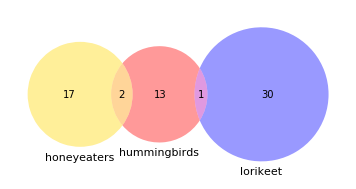

In [155]:
## Plot venn diagrams for gene intersections
gene_sets = [set(genes_hmmbrds_BH_sign.values), set(genes_honeyeaters_BH_sign.values), set(genes_lorikeet_BH_sign.values)]
set_names = ['hummingbirds', 'honeyeaters', 'lorikeet']
set_colors = ['red', 'gold', 'blue']
v3 = venn.venn3(gene_sets, (set_names), set_colors)
for text in v3.set_labels:
    text.set_fontsize(11)
plt.savefig(results_dir + 'gene_intersect_BH_3_clades.pdf')
plt.show()

# v2 = venn.venn2((14,63,0), ('parrots', 'other nectar birds'), ('green', 'gold'))
# for text in v2.set_labels:
#    text.set_fontsize(11)
# plt.savefig(results_dir + 'gene_no_intersect_parrots.pdf')
# plt.show()

201


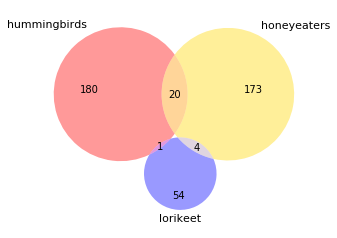

In [38]:
## Intersect anno- and TOGA-based results
intersect_genes_hmmbrds_f = glob('/Users/osipova/Documents/Py_scripts/absrel/intersect.hmmbrds.genes_p0.05_raw.toga_anno.lst')[0]
intersect_genes_honeyeaters_f = glob('/Users/osipova/Documents/Py_scripts/absrel/intersect.honeyeaters.genes_p0.05_raw.toga_anno.lst')[0]
intersect_genes_lorikeet_f = glob('/Users/osipova/Documents/Py_scripts/absrel/intersect.lorikeet.genes_p0.05_raw.toga_anno.lst')[0]

intersect_hmmbrds = pd.read_csv(intersect_genes_hmmbrds_f)
intersect_honeyeaters = pd.read_csv(intersect_genes_honeyeaters_f)
intersect_lorikeet = pd.read_csv(intersect_genes_lorikeet_f)

## Plot venn diagrams for gene intersections
gene_sets = [set(intersect_hmmbrds.values.flatten()), set(intersect_honeyeaters.values.flatten()),set(intersect_lorikeet.values.flatten())]
set_names = ['hummingbirds', 'honeyeaters', 'lorikeet']
set_colors = ['red', 'gold', 'blue']
v3 = venn.venn3(gene_sets, (set_names), set_colors)
for text in v3.set_labels:
    text.set_fontsize(11)
plt.savefig('gene_intersect_toga_anno_raw_p0.05.pdf')
plt.show()

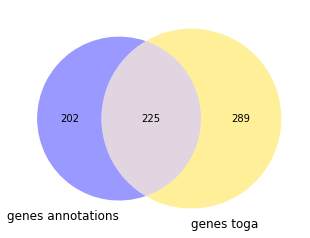

In [5]:
## Not ralated: venn diagramm of genes under positive selection when ranked by ratio of nectar-takers
# p-value <= 0.05
# v2 = venn.venn2((217,367,332), ('genes annotations', 'genes toga'), ('blue', 'gold'))

# p-value <= 0.01
v2 = venn.venn2((202,289,225), ('genes annotations', 'genes toga'), ('blue', 'gold'))

#plt.savefig('gene_intersect_0.05_toga_anno_ranked_0.5_nectar.pdf')
plt.savefig('gene_intersect_0.01_toga_anno_ranked_0.5_nectar.pdf')

In [93]:
#### Intentionally left blank ####

array(['gene-NM_001006255.2', 'gene-XM_015290600.2', 'gene-NM_001030924.2',
       'gene-XM_015277855.2', 'gene-NM_001271911.1', 'gene-NM_001278147.1',
       'gene-NM_001319006.1', 'gene-NM_001319010.1', 'gene-NM_001320422.1',
       'gene-NM_001321543.1', 'gene-XM_025152068.1', 'gene-NM_204522.1',
       'gene-NM_205130.1', 'gene-XM_001233205.5', 'gene-XM_001235170.5',
       'gene-XM_003640365.4', 'gene-XM_003641847.4', 'gene-XM_004935439.3',
       'gene-XM_015283981.2', 'gene-NM_001329510.1', 'gene-XM_004939325.3',
       'gene-XM_004940680.3', 'gene-XM_025147486.1', 'gene-XM_015275224.2',
       'gene-XM_015276198.2', 'gene-NM_001030625.1', 'gene-XM_015277642.2',
       'gene-XM_015279813.2', 'gene-XM_015279891.2', 'gene-XM_015283911.2',
       'gene-XM_015286284.2', 'gene-XM_015289269.2', 'gene-XM_025152692.1',
       'gene-XM_015290748.2', 'gene-XM_426667.6', 'gene-XM_015297260.2',
       'gene-XM_015298393.2', 'gene-XM_015300112.2', 'gene-XM_025141423.1',
       'gene-XM_02514

In [ ]:
## Ankrd26 gene family expansion

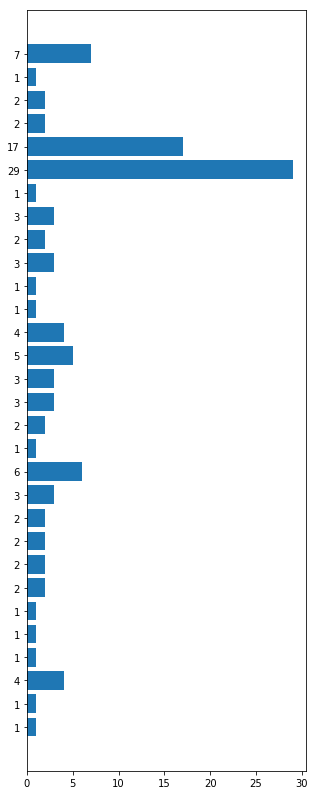

In [95]:
l = [7, 1, 2, 2, 17, 29, 1, 3, 2, 3, 1, 1, 4, 5, 3, 3, 2, 1, 6, 3, 2, 2, 2, 2, 1, 1, 1, 4, 1, 1]
n = [i for i in range(len(l))]
n.reverse()
plt.figure(figsize=(5,14))
plt.yticks(n, l)
plt.barh(n, l)
plt.savefig('Ankrd26_gene_counts_barplot.svg')